In [78]:
import os
import json
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
def obtener_emociones(ruta_carpeta):
    emociones = ["neutral", "happy", "sad", "angry", "fearful", "disgusted", "surprised"]
    rows = []

    # Iterar sobre los directorios de la página
    for pagina in os.listdir(ruta_carpeta):
        ruta_carpeta_completa = os.path.join(ruta_carpeta, pagina)
        # print(pagina)
        # Verificar si es un directorio
        if os.path.isdir(ruta_carpeta_completa):
            # Iterar sobre los usuarios dentro de la carpeta
            for seccion in os.listdir(ruta_carpeta_completa):
                ruta_carpeta_completa_secs = os.path.join(ruta_carpeta_completa, seccion)
                for usuario in os.listdir(ruta_carpeta_completa_secs):
                    ruta_usuario = os.path.join(ruta_carpeta_completa_secs, usuario)
                    if os.path.isdir(ruta_usuario):
                        for emotions_file in os.listdir(ruta_usuario):
                            ruta_file = os.path.join(ruta_usuario, emotions_file)
                            # Verificar si es un archivo de texto
                            if emotions_file.endswith('.txt'):
                                with open(ruta_file, 'r') as file:
                                    data = file.read()
                                    emociones_json = json.loads(data)
                                    for emocion_obj in emociones_json:
                                        for emocion, valor in emocion_obj.items():  # Iterar sobre cada par clave-valor
                                            rows.append({
                                                "Participante": usuario,
                                                "Pagina": pagina,
                                                "Archivo": emotions_file,
                                                "Emocion": emocion,
                                                "Valor": valor
                                            })
    return rows

In [114]:
import os

path_actual = os.getcwd()
emocs = "resultados_emociones"
path_emocs = os.path.join(path_actual, emocs)
print("El directorio actual es:", path_emocs)


El directorio actual es: c:\Users\HP\Desktop\EPN\HCI\PROY_FINAl\resultados_emociones\resultados_emociones


In [115]:
emociones = obtener_emociones(path_emocs)

In [116]:
df = pd.DataFrame(emociones)

In [117]:
print(df)

      Participante   Pagina          Archivo    Emocion         Valor
0             Juan  Pagina1   CatalogoC1.txt    neutral  9.978713e-01
1             Juan  Pagina1   CatalogoC1.txt      happy  8.168514e-06
2             Juan  Pagina1   CatalogoC1.txt        sad  1.507065e-03
3             Juan  Pagina1   CatalogoC1.txt      angry  1.196929e-04
4             Juan  Pagina1   CatalogoC1.txt    fearful  7.166094e-08
...            ...      ...              ...        ...           ...
20631          Pao  Pagina3  nosotros_p3.txt        sad  8.883473e-09
20632          Pao  Pagina3  nosotros_p3.txt      angry  8.263394e-08
20633          Pao  Pagina3  nosotros_p3.txt    fearful  1.614068e-10
20634          Pao  Pagina3  nosotros_p3.txt  disgusted  4.207019e-08
20635          Pao  Pagina3  nosotros_p3.txt  surprised  9.538471e-08

[20636 rows x 5 columns]


In [121]:
# Filtrar las filas donde el participante es 'Pao' y la página es 'Pagina1'
filtro = df[(df['Participante'] == 'Pao') & (df['Pagina'] == 'Pagina3') & (df['Emocion'] == 'angry')]

# Imprimir las filas filtradas
print(filtro)


      Participante   Pagina          Archivo Emocion         Valor
14101          Pao  Pagina3      home_p2.txt   angry  1.027568e-06
14108          Pao  Pagina3      home_p2.txt   angry  1.262819e-06
14115          Pao  Pagina3      home_p2.txt   angry  8.497939e-07
14122          Pao  Pagina3      home_p2.txt   angry  4.880464e-06
14129          Pao  Pagina3      home_p2.txt   angry  5.229184e-07
...            ...      ...              ...     ...           ...
20604          Pao  Pagina3  nosotros_p3.txt   angry  5.576785e-08
20611          Pao  Pagina3  nosotros_p3.txt   angry  3.776401e-09
20618          Pao  Pagina3  nosotros_p3.txt   angry  2.442504e-07
20625          Pao  Pagina3  nosotros_p3.txt   angry  5.976237e-07
20632          Pao  Pagina3  nosotros_p3.txt   angry  8.263394e-08

[451 rows x 5 columns]


In [122]:
# Supongamos que df es tu DataFrame
# Agrupa los datos por Participante, Página, Interfaz y Emoción, y calcula el promedio de los valores
promedio_emociones = df.groupby(['Participante', 'Pagina', 'Emocion'])['Valor'].mean().reset_index()

print(promedio_emociones)

   Participante   Pagina    Emocion     Valor
0          Juan  Pagina1      angry  0.011588
1          Juan  Pagina1  disgusted  0.005809
2          Juan  Pagina1    fearful  0.000120
3          Juan  Pagina1      happy  0.028863
4          Juan  Pagina1    neutral  0.761167
..          ...      ...        ...       ...
65          Pao  Pagina3    fearful  0.000237
66          Pao  Pagina3      happy  0.440167
67          Pao  Pagina3    neutral  0.508582
68          Pao  Pagina3        sad  0.027822
69          Pao  Pagina3  surprised  0.003937

[70 rows x 4 columns]


In [96]:
promedio_emociones_I1 = promedio_emociones[promedio_emociones["Pagina"]=="Pagina1"]
promedio_emociones_I2 = promedio_emociones[promedio_emociones["Pagina"]=="Pagina2"]
promedio_emociones_I3 = promedio_emociones[promedio_emociones["Pagina"]=="Pagina3"]

In [97]:
promedio_emociones_I1.to_excel('promedio_emociones_i1.xlsx', index=True)

promedio_emociones_I2.to_excel('promedio_emociones_i2.xlsx', index=True)

promedio_emociones_I3.to_excel('promedio_emociones_i3.xlsx', index=True)

In [98]:
promedio_emociones_juan = promedio_emociones[promedio_emociones["Participante"]=="Juan"]
promedio_emociones_mire = promedio_emociones[promedio_emociones["Participante"]=="Mire"]
promedio_emociones_pao = promedio_emociones[promedio_emociones["Participante"]=="Pao"]

In [99]:
promedio_emociones_juan.to_excel('promedio_emociones_juan.xlsx', index=True)

promedio_emociones_mire.to_excel('promedio_emociones_mire.xlsx', index=True)

promedio_emociones_pao.to_excel('promedio_emociones_pao.xlsx', index=True)

In [129]:
# Definir la función para calcular Cohen's d
def calcular_cohens_d(datos1, datos2):
    mean1, mean2 = datos1.mean(), datos2.mean()
    n1, n2 = len(datos1), len(datos2)
    std1, std2 = datos1.std(), datos2.std()

    # Calcular la desviación estándar combinada
    pooled_std = ((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / (n1 + n2 - 2)
    pooled_std = pooled_std ** 0.5

    # Calcular Cohen's d
    cohens_d = (mean1 - mean2) / pooled_std
    return cohens_d

In [126]:
promedio_emociones_2 = pd.read_excel("./promedio_emociones (2).xlsx")

In [127]:
promedio_emociones_2

,Unnamed: 0,Participante,Pagina,Archivo,Emocion,Valor
0,0,Juan,Pharmacys,Juan_emociones_pharmacys.txt,neutral,0.768678
1,1,Juan,Pharmacys,Juan_emociones_pharmacys.txt,happy,0.021412
2,2,Juan,Pharmacys,Juan_emociones_pharmacys.txt,sad,0.000958
3,3,Juan,Pharmacys,Juan_emociones_pharmacys.txt,angry,0.087453
4,4,Juan,Pharmacys,Juan_emociones_pharmacys.txt,fearful,0.000422
...,...,...,...,...,...,...
7989,7989,Mili,SanaSana,Mili_emociones_sanasana.txt,sad,0.002435
7990,7990,Mili,SanaSana,Mili_emociones_sanasana.txt,angry,0.062153
7991,7991,Mili,SanaSana,Mili_emociones_sanasana.txt,fearful,0.000312
7992,7992,Mili,SanaSana,Mili_emociones_sanasana.txt,disgusted,0.019059


In [132]:
# Calcular el p-value y Cohen's d para cada combinación de interfaz y emoción
resultados_anova = []
for (usuario, emocion), df_group in promedio_emociones_2.groupby(['Participante', 'Emocion']):
    paginas_data = []
    for pagina, pagina_df in df_group.groupby('Pagina'):
        paginas_data.append(pagina_df['Valor'])
    p_value = f_oneway(*paginas_data).pvalue

    # Calcula Cohen's d
    cohens_d = calcular_cohens_d(paginas_data[0], paginas_data[1])

    resultados_anova.append((usuario, emocion, p_value, cohens_d))

# Convertir los resultados de ANOVA a DataFrame
resultados_anova_df = pd.DataFrame(resultados_anova, columns=['Participante', 'Emocion', 'p-value', 'Cohen\'s d'])

# Imprimir los resultados del ANOVA
# print("Resultados ANOVA:")
# print(resultados_anova_df)

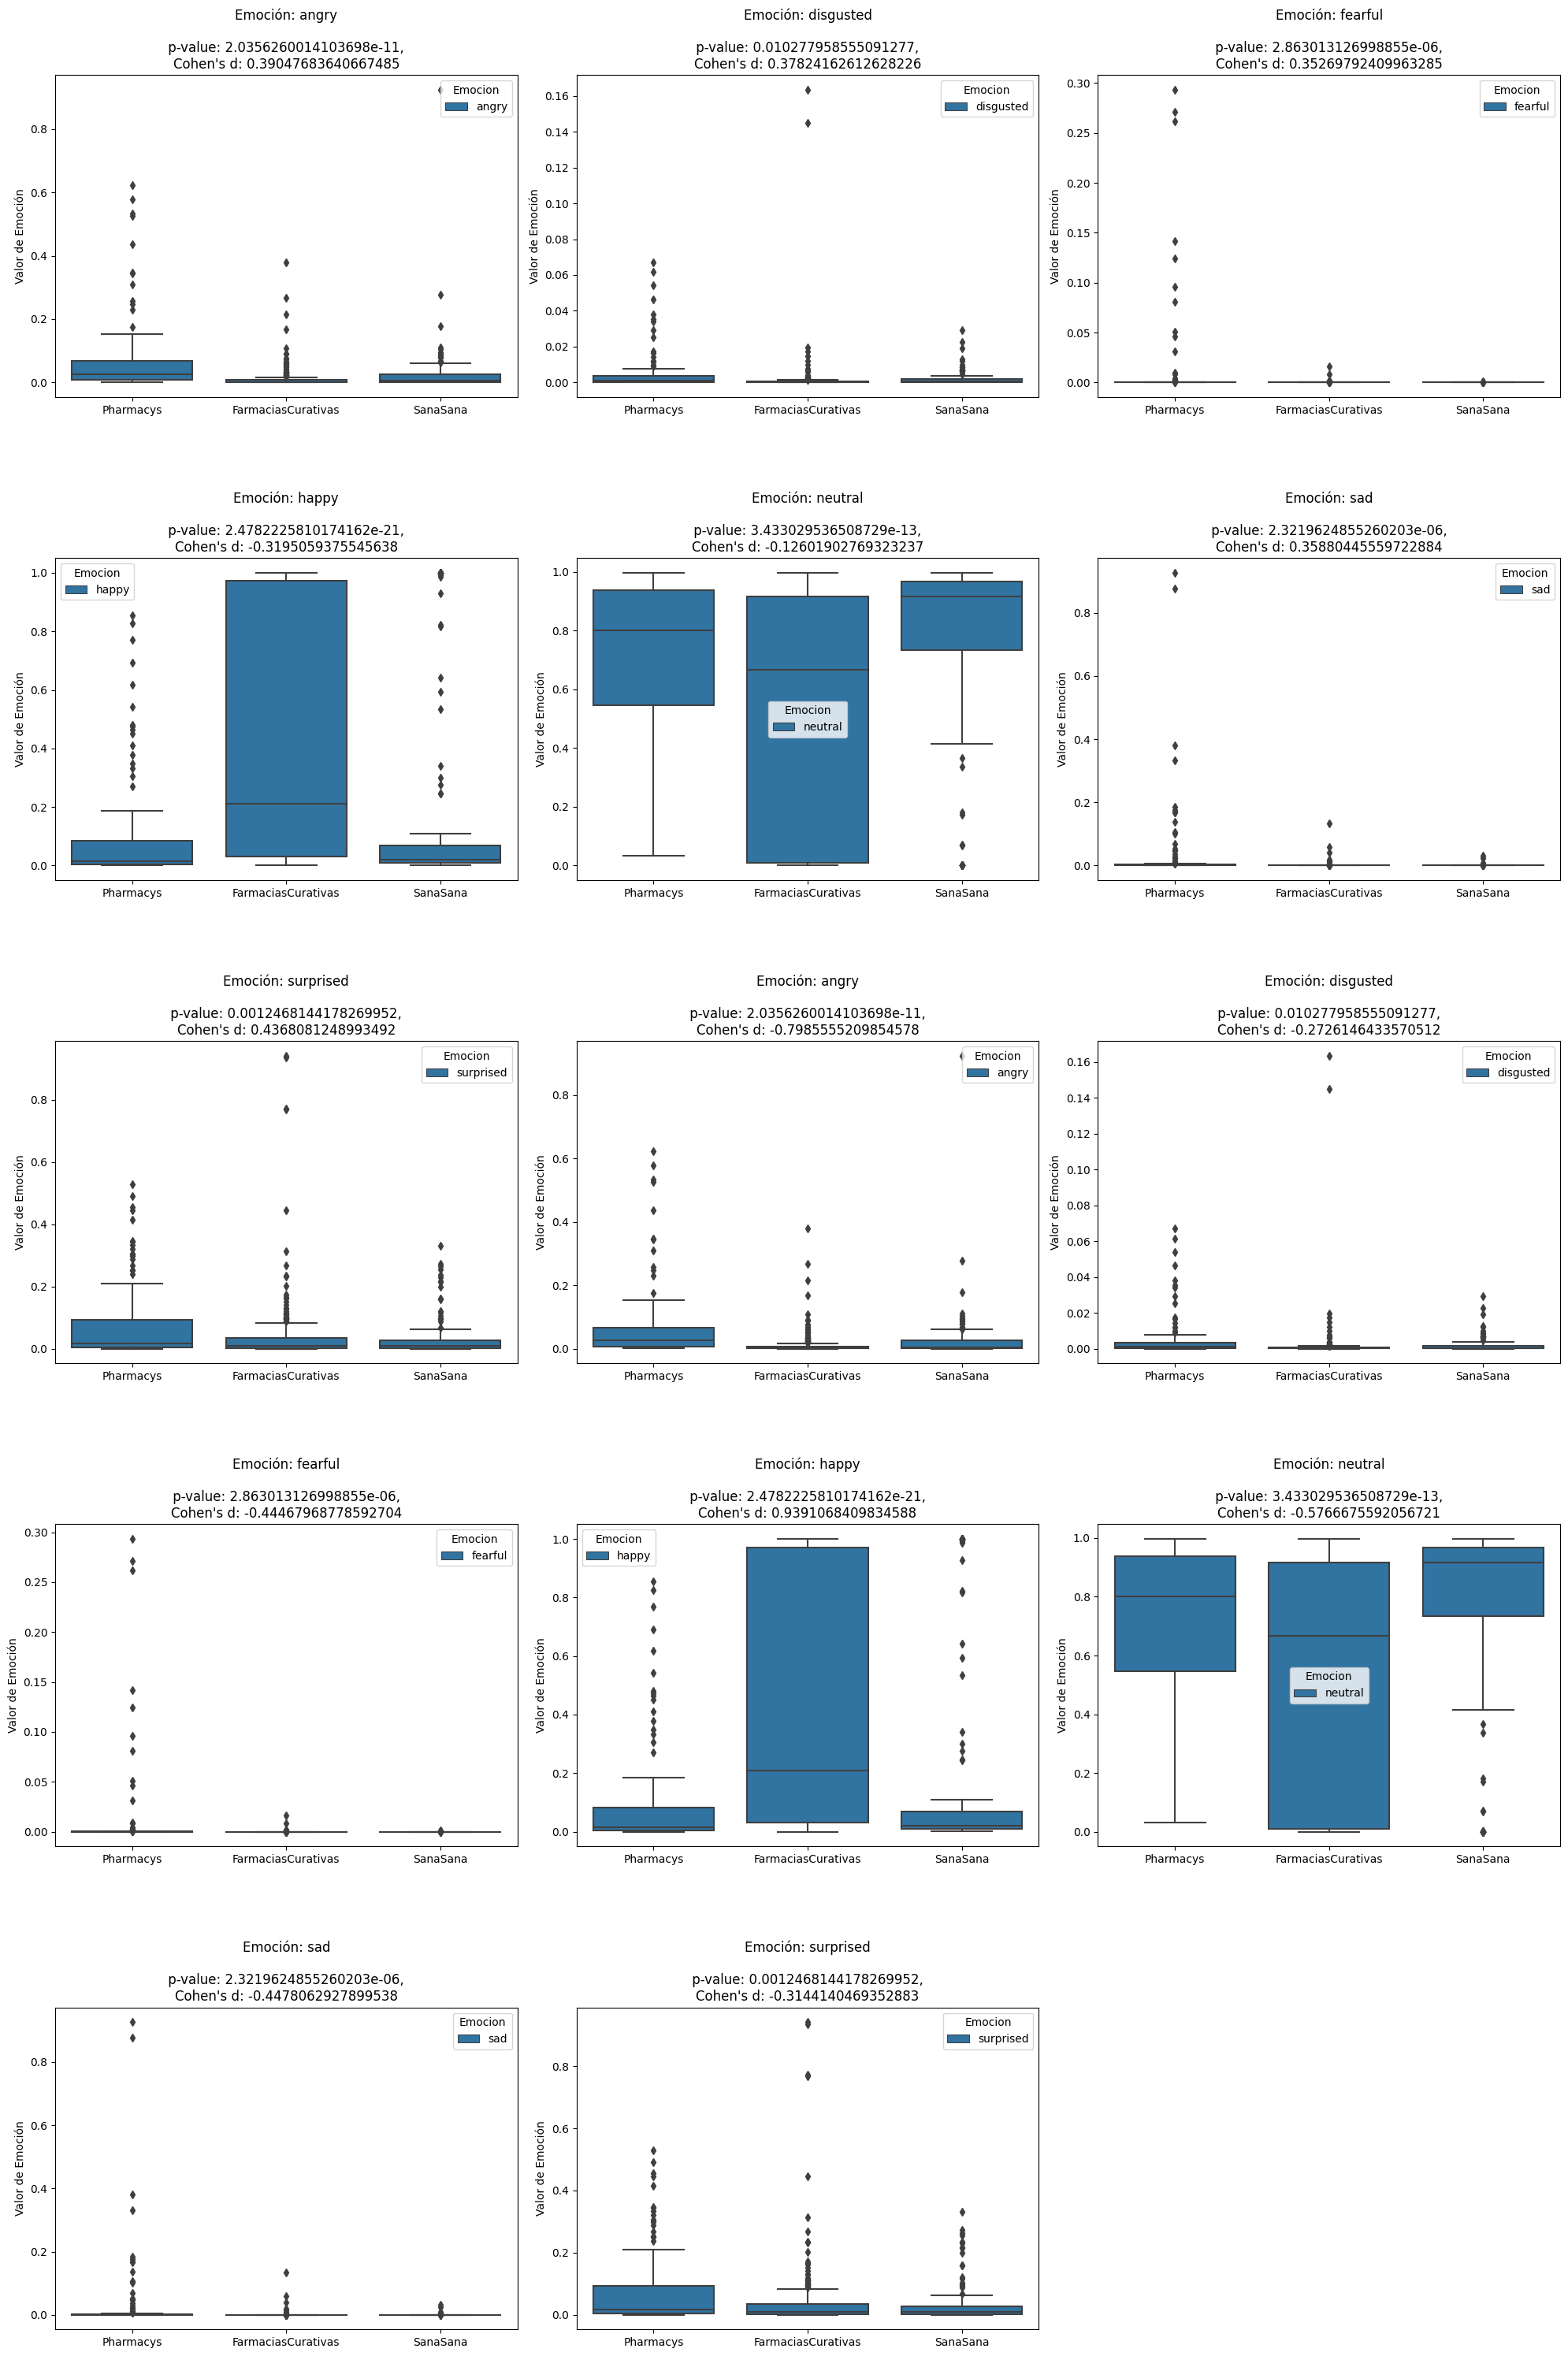

In [135]:
# Calcular el número de subplots necesarios
num_subplots = len(resultados_anova_df)

# Calcular el número de filas y columnas necesarias
num_cols = 3
num_rows = -(-num_subplots // num_cols)  # Round up division

# Crear la figura para los diagramas de caja
plt.figure(figsize=(20, 6*num_rows))

# Crear los diagramas de caja para cada combinación de interfaz y emoción
for index, (interfaz, emocion, p_value, cohens_d) in resultados_anova_df.iterrows():
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=promedio_emociones_2[(promedio_emociones_2['Participante'] == usuario) &
                                         (promedio_emociones_2['Emocion'] == emocion)],
                x='Pagina', y='Valor', hue='Emocion')
    plt.title(f'Emoción: {emocion}\n\n p-value: {p_value}, \nCohen\'s d: {cohens_d}')

    plt.xlabel('')
    plt.ylabel('Valor de Emoción')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()